<p align="center">
<img alt="logo" src="https://upload.wikimedia.org/wikipedia/ar/thumb/1/16/Birzeit_University_logo.svg/320px-Birzeit_University_logo.svg.png"/>
<br>
Faculty of Engineering and Technology<br>
Electrical and Computer Engineering Department<br></p>
<hr>
<hr>
<p align="center">
ENCS5343 Computer Vision<br>
Assignment #1<br>
Student Name: Maysam Khatib<br>
Student ID: 1190207
</p>
<hr>

# **ENCS5343 Computer Vision - Assignment \#1**

## **Question 1:**
Look for an image from the internet with the following properties: 8-bit gray-level, 256x256 pixels in size.

### *1- Show this image. Don't use your friends' ones.*

In [2]:
from io import BytesIO
from urllib.request import urlopen
from PIL import Image
import matplotlib.pyplot as plt

# Open the URL and read the content of it
image_url = 'http://www.eecs.northwestern.edu/~faisal/d20/baboon.bmp'
response = urlopen(image_url)
image_content = BytesIO(response.read())

# Open the image
image = Image.open(image_content)
image = image.convert('L')  # Convert to grayscale
image = image.resize((256, 256))

# Show the image
plt.figure(figsize=(10, 5))
plt.imshow(image, cmap='gray')
plt.title('Baboon Image (8-bit gray-level, 256x256 pixels)')
plt.show()

### *2- Apply a power law transformation with gamma=0.4 to the image and show the image after the transformation.*

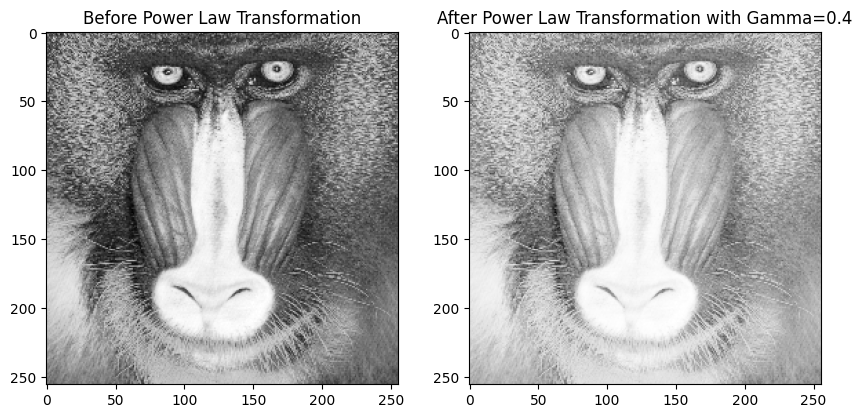

In [3]:
import numpy as np

# Convert the image to numpy array so we can apply the transformation on it
image_array = np.array(image)

# Apply the power law transformation
gamma = 0.4
power_low_transformed_img = image_array ** gamma

# Show the image before and after the transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Before Power Law Transformation')

plt.subplot(1, 2, 2)
plt.imshow(power_low_transformed_img, cmap='gray')
plt.title(f'After Power Law Transformation with Gamma={gamma}')

plt.show()

### *3- Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the original image and show the resulting image.*

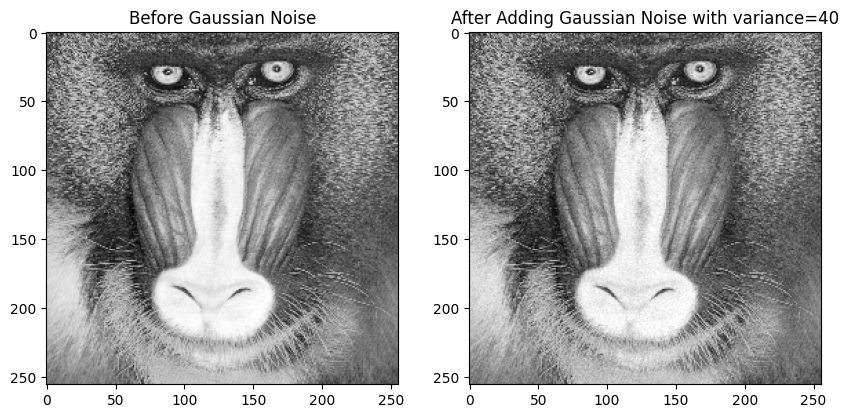

In [4]:
# Generate a gaussian noise with zero-mean and 40 variance
mean = 0
variance = 40
# loc -> mean, scale -> standard deviation -> (suare root of variance)
gaussian_noise = np.random.normal(loc=mean, scale=np.sqrt(variance), size=image_array.shape)

# Add the noise to our original image
image_with_gaussian_noise = image_array + gaussian_noise
image_with_gaussian_noise = np.clip(image_with_gaussian_noise, 0, 255).astype(np.uint8)

# Show the image before and after adding noise
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Before Gaussian Noise')

plt.subplot(1, 2, 2)
plt.imshow(image_with_gaussian_noise, cmap='gray')
plt.title(f'After Adding Gaussian Noise with variance={variance}')

plt.show()


### *4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 above and show the result. Discuss the results in your report.*

In [5]:
import cv2

kernel_size = 5

# Method 1: by calculation
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

# The image that we will put the new pixels on it
mean_filter_image = np.zeros_like(image_with_gaussian_noise, dtype=np.float32)

# Using convolution to apply the mean filter to each pixel
for i in range(2, image_with_gaussian_noise.shape[0]-2):
    for j in range(2, image_with_gaussian_noise.shape[1]-2):
        neighbors = image_with_gaussian_noise[i-2:i+3, j-2:j+3]
        mean_filter_image[i, j] = np.sum(neighbors * kernel)

# Method 2: by openCV
cv_filtered_image = cv2.blur(image_with_gaussian_noise, (kernel_size, kernel_size))


# Show the noisy image and the filterd images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_with_gaussian_noise, cmap='gray')
plt.title('Image with Gaussian Noise')

plt.subplot(1, 3, 2)
plt.imshow(mean_filter_image, cmap='gray')
plt.title(f'Image with Mean Filter (by calculations)')

plt.subplot(1, 3, 3)
plt.imshow(cv_filtered_image, cmap='gray')
plt.title(f'Image with Mean Filter (by openCV)')

plt.show()

Mean filter is one of the nonlinear spatial filters, it takes the average (mean) of the neighbor pixels (5x5 here).
As shown from the above photos, mean filter reduced the noise from the noisy image and made the image smoother and softer.

The problem now is the image is very blurred which means that it will be harder to detect the edges especially if they are required in the output.

In conclusion, mean filter is a way to reduce noise but it's not the best way because its contribution of blurring edges.


### *5- Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images.*

In [6]:
# Add salt and pepper noise to the original image
density = 0.1

# The image to add the noise to it
salt_and_paper_noise_image = image_array.copy()

# Choose random pixels to put the salt noise on
number_of_salt_noise_pixels = np.ceil(density * image_array.size * 0.5)
salt_pixels = [np.random.randint(0, i - 1, int(number_of_salt_noise_pixels)) for i in image_array.shape]
salt_and_paper_noise_image[salt_pixels[0], salt_pixels[1]] = 255

# Choose random pixels to put the pepper noise on
number_of_pepper_noise_pixels = np.ceil(density * image_array.size * 0.5)
pepper_pixels = [np.random.randint(0, i - 1, int(number_of_pepper_noise_pixels)) for i in image_array.shape]
salt_and_paper_noise_image[pepper_pixels[0], pepper_pixels[1]] = 0

# Apply the 7 by 7 median filter by openCV to the salt and pepper noisy image
median_filtered_image = cv2.medianBlur(salt_and_paper_noise_image, 7)

# Show the noisy image and the filterd image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(salt_and_paper_noise_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title(f'Image with Median Filter (by openCV)')

plt.show()

### *6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the result. Discuss the results in your report.*

In [7]:
# Apply a 7 by 7 mean filter by OpenCV to the salt and pepper noisy image
mean_filtered_image = cv2.blur(salt_and_paper_noise_image.astype(np.uint8), (7, 7))

# Show the noisy image and the filterd image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(salt_and_paper_noise_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title(f'Image with Median Filter (by openCV)')

plt.subplot(1, 3, 3)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title(f'Image with Mean Filter (by openCV)')

plt.show()

Median filter is one of the nonlinear spatial filters, it calculates the median value for the pixel by conidering the neighbor pixels (7x7 here).

As shown above, the median filter is better than the mean filter for reducing salt and pepper noise because it's doing well when there are outliars and extreme values, and it preserve the edges better than the mean filter.

### *7- Apply a Sobel filter to the original image and show the response (don't use ready functions to do this part).*

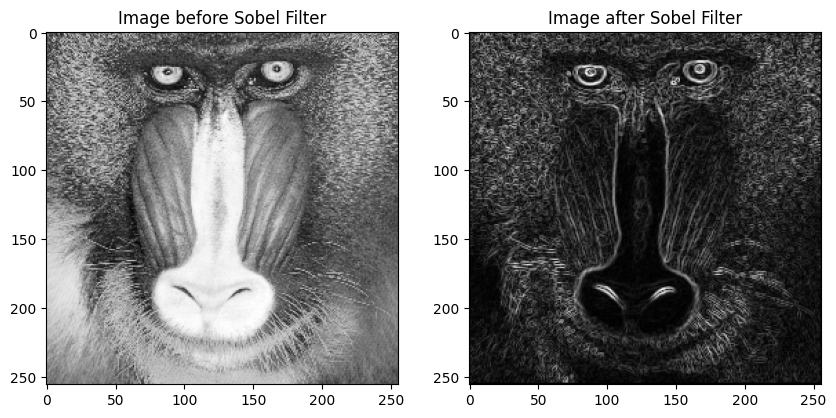

In [12]:
# Initilize the sobel arrays
x_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# The image that we will put the new pixels on it
sobel_filter_image = np.zeros_like(image_array, dtype=np.float32)

# Using convolution to apply the sobel filter to each pixel
for i in range(1, image_array.shape[0] - 1):
    for j in range(1, image_array.shape[1] - 1):
        x_gradiant = np.sum(image_array[i-1:i+2, j-1:j+2] * x_sobel)
        y_gradiant = np.sum(image_array[i-1:i+2, j-1:j+2] * y_sobel)
        sobel_filter_image[i, j] = np.sqrt(x_gradiant**2 + y_gradiant**2)

# Show the image before and after the filter
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Image before Sobel Filter')

plt.subplot(1, 2, 2)
plt.imshow(sobel_filter_image, cmap='gray')
plt.title('Image after Sobel Filter')

plt.show()

## **Question 2:**
Write a function that convolves an image with a given convolution filter

function[output_Image] = myImageFilter(Input_image, filter)

Your function should output image of the same size as that of input Image (use padding). Test your function (on attached images “House1.jpg” and “House2.jpg”) and show results on the following Kernels.



In [13]:
import math

def myImageFilter(input_image, filter):
  # Get the pad width and height which is the half of the filter width and height
  pad_height = filter.shape[0] // 2
  pad_width = filter.shape[1] // 2

  # Pad the image
  padded_image = np.pad(input_image, ((pad_height, pad_height), (pad_width, pad_width)))

  # Initialize the output image to put the output on it
  output_image = np.zeros_like(input_image)

  filter_height = filter.shape[0]
  filter_width = filter.shape[1]
  # Using convolution to apply the filter to each pixel
  for i in range(input_image.shape[0]):
      for j in range(input_image.shape[1]):
        output_image[i, j] = np.sum(padded_image[i:i+filter_height, j:j+filter_width] * filter)

  return output_image

In [14]:
input_image1 = np.array(Image.open("House1.jpg").convert('L'), dtype=np.float32)
input_image2 = np.array(Image.open("House2.jpg").convert('L'), dtype=np.float32)

### *1- Averaging Kernel (3x3 and 5x5 )*

In [15]:
averaging_kernal_3x3 = np.ones((3, 3)) / (3**2)
averaging_kernal_5x5 = np.ones((5, 5)) / (5**2)

output_image1_avg_kernal_3x3 = myImageFilter(input_image1, averaging_kernal_3x3)
output_image2_avg_kernal_3x3 = myImageFilter(input_image2, averaging_kernal_3x3)
output_image1_avg_kernal_5x5 = myImageFilter(input_image1, averaging_kernal_5x5)
output_image2_avg_kernal_5x5 = myImageFilter(input_image2, averaging_kernal_5x5)

In [16]:
# Show the images
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('House1.jpg')

plt.subplot(2, 3, 2)
plt.imshow(output_image1_avg_kernal_3x3, cmap='gray')
plt.title('Image after Filtering (Averaging kernel: 3x3)')

plt.subplot(2, 3, 3)
plt.imshow(output_image1_avg_kernal_5x5, cmap='gray')
plt.title('Image after Filtering (Averaging kernel: 5x5)')

plt.subplot(2, 3, 4)
plt.imshow(input_image2, cmap='gray')
plt.title('House2.jpg')

plt.subplot(2, 3, 5)
plt.imshow(output_image2_avg_kernal_3x3, cmap='gray')
plt.title('Image after Filtering (Averaging kernel: 3x3)')

plt.subplot(2, 3, 6)
plt.imshow(output_image2_avg_kernal_5x5, cmap='gray')
plt.title('Image after Filtering (Averaging kernel: 5x5)')

plt.show()

### *2- Gaussian Kernel (σ = 1,2,3 ) Use (2σ +1)x(2σ +1) as size of Kernel (You may write a separate function to generate Gaussian Kernels for different values of σ). Discuss the results in your report.*

In [17]:
def getGaussianKernel(sigma):
  size = (2 * sigma) + 1

  # Initilize a 2D array to put the kernel on
  kernel = np.zeros((size, size))

  # Put the values in the kernal
  for i in range(size):
    for j in range(size):
      distance_from_center = math.sqrt(((i - (size // 2)) ** 2) + ((j - (size // 2)) ** 2))
      kernel[i, j] = math.exp(-(distance_from_center ** 2) / (2 * sigma ** 2))

  return kernel / kernel.sum()

gaussian_kernal_sigma1 = getGaussianKernel(1)
gaussian_kernal_sigma2 = getGaussianKernel(2)
gaussian_kernal_sigma3 = getGaussianKernel(3)

gaussian_output11 = myImageFilter(input_image1, gaussian_kernal_sigma1)
gaussian_output12 = myImageFilter(input_image1, gaussian_kernal_sigma2)
gaussian_output13 = myImageFilter(input_image1, gaussian_kernal_sigma3)

gaussian_output21 = myImageFilter(input_image2, gaussian_kernal_sigma1)
gaussian_output22 = myImageFilter(input_image2, gaussian_kernal_sigma2)
gaussian_output23 = myImageFilter(input_image2, gaussian_kernal_sigma3)

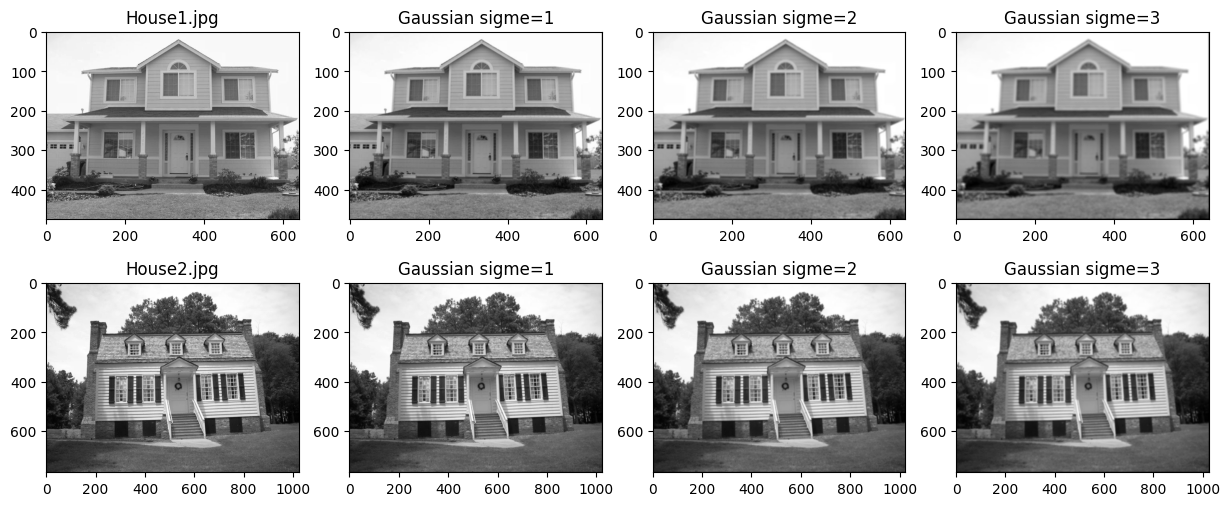

In [18]:
images = [input_image1, gaussian_output11, gaussian_output12, gaussian_output13,
          input_image2, gaussian_output21, gaussian_output22, gaussian_output23]

titles = ["House1.jpg", "Gaussian sigme=1", "Gaussian sigme=2", "Gaussian sigme=3",
          "House2.jpg", "Gaussian sigme=1", "Gaussian sigme=2", "Gaussian sigme=3"]

# Show the images
plt.figure(figsize=(15, 6))

for i, image in enumerate(images):
  plt.subplot(2, 4, i+1)
  plt.imshow(image, cmap='gray')
  plt.title(titles[i])

### *3- Sobel Edge Operators*

In [19]:
# Initilize the sobel arrays
x_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_x_output1 = myImageFilter(input_image1, x_sobel)
sobel_y_output1 = myImageFilter(input_image1, y_sobel)

sobel_output1 = np.sqrt((sobel_x_output1 ** 2 + sobel_y_output1 ** 2 ))

sobel_x_output2 = myImageFilter(input_image2, x_sobel)
sobel_y_output2 = myImageFilter(input_image2, y_sobel)

sobel_output2 = np.sqrt((sobel_x_output2 ** 2 + sobel_y_output2 ** 2 ))

In [20]:
# Show the images
plt.figure(figsize=(15, 7))

plt.subplot(2, 4, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('House1.jpg')

plt.subplot(2, 4, 2)
plt.imshow(sobel_output1, cmap='gray')
plt.title('Sobel Operators')

plt.subplot(2, 4, 3)
plt.imshow(sobel_x_output1, cmap='gray')
plt.title('Sobel Operator X')

plt.subplot(2, 4, 4)
plt.imshow(sobel_y_output1, cmap='gray')
plt.title('Sobel Operator y')

plt.subplot(2, 4, 5)
plt.imshow(input_image2, cmap='gray')
plt.title('House2.jpg')

plt.subplot(2, 4, 6)
plt.imshow(sobel_output2, cmap='gray')
plt.title('Sobel Operators')

plt.subplot(2, 4, 7)
plt.imshow(sobel_x_output2, cmap='gray')
plt.title('Sobel Operator X')

plt.subplot(2, 4, 8)
plt.imshow(sobel_y_output2, cmap='gray')
plt.title('Sobel Operator y')

plt.show()

### *4- Prewitt Edge Operators*

In [21]:
# Initilize the Prewitt arrays
x_prewitt = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
y_prewitt = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x_output1 = myImageFilter(input_image1, x_prewitt)
prewitt_y_output1 = myImageFilter(input_image1, y_prewitt)

prewitt_output1 = np.sqrt((prewitt_x_output1**2 + prewitt_y_output1**2 ))

prewitt_x_output2 = myImageFilter(input_image2, x_prewitt)
prewitt_y_output2 = myImageFilter(input_image2, y_prewitt)

prewitt_output2 = np.sqrt((prewitt_x_output2**2 + prewitt_y_output2**2 ))

In [23]:
# Show the images
plt.figure(figsize=(15, 7))

plt.subplot(2, 4, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('House1.jpg')

plt.subplot(2, 4, 2)
plt.imshow(prewitt_output1, cmap='gray')
plt.title('Prewitt Operators')

plt.subplot(2, 4, 3)
plt.imshow(prewitt_x_output1, cmap='gray')
plt.title('Prewitt Operator X')

plt.subplot(2, 4, 4)
plt.imshow(prewitt_y_output1, cmap='gray')
plt.title('Prewitt Operator y')

plt.subplot(2, 4, 5)
plt.imshow(input_image2, cmap='gray')
plt.title('House2.jpg')

plt.subplot(2, 4, 6)
plt.imshow(prewitt_output2, cmap='gray')
plt.title('Prewitt Operators')

plt.subplot(2, 4, 7)
plt.imshow(prewitt_x_output2, cmap='gray')
plt.title('Prewitt Operator X')

plt.subplot(2, 4, 8)
plt.imshow(prewitt_y_output2, cmap='gray')
plt.title('Prewitt Operator y')

plt.show()

## **Question 3:**
Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise.
Apply 5 by 5 Averaging and Median filter and show your outputs. Why Median filter works better than averaging filter?

In [24]:
# Load the images
noisy_image1 = np.array(Image.open('Noisyimage1.jpg').convert('L'), dtype=np.float32)
noisy_image2 = np.array(Image.open('Noisyimage2.jpg').convert('L'), dtype=np.float32)

In [25]:
# Apply Averaging Filter
mean_filtered_image1 = cv2.blur(noisy_image1.astype(np.uint8), (5, 5))
mean_filtered_image2 = cv2.blur(noisy_image2.astype(np.uint8), (5, 5))

# Apply Median Filter
median_filtered_image1 = cv2.medianBlur(noisy_image1.astype(np.uint8), 5)
median_filtered_image2 = cv2.medianBlur(noisy_image2.astype(np.uint8), 5)

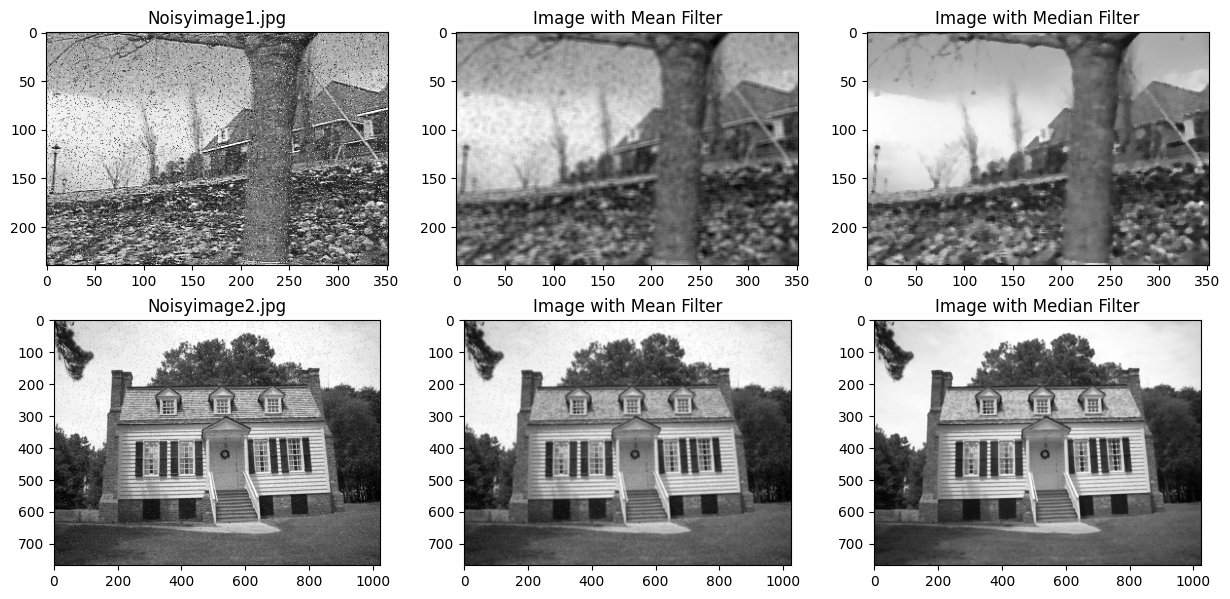

In [26]:
# Show the noisy image and the filterd image
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(noisy_image1, cmap='gray')
plt.title('Noisyimage1.jpg')

plt.subplot(2, 3, 2)
plt.imshow(mean_filtered_image1, cmap='gray')
plt.title(f'Image with Mean Filter')

plt.subplot(2, 3, 3)
plt.imshow(median_filtered_image1, cmap='gray')
plt.title(f'Image with Median Filter')

plt.subplot(2, 3, 4)
plt.imshow(noisy_image2, cmap='gray')
plt.title('Noisyimage2.jpg')

plt.subplot(2, 3, 5)
plt.imshow(mean_filtered_image2, cmap='gray')
plt.title(f'Image with Mean Filter')

plt.subplot(2, 3, 6)
plt.imshow(median_filtered_image2, cmap='gray')
plt.title(f'Image with Median Filter')

plt.show()

Averaging filter calculate the value of the pixel by measuring the mean of its neighbors, which may not function effectively in the presence of extreme values (salt and pepper noise). The averaging method blurs the image also and may not completely eliminate outliers.

While the median filter replace the value of the pixel with the median value of its neighbors which means better performance with the outliers and extreme values such as the salt and pepper noise. Also, it is better than the averaging method in preserving the edges.

## **Question 4:**
Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel
gradients function).

### *1- Stretch the resulting magnitude (between 0 to 255) for better visualization*

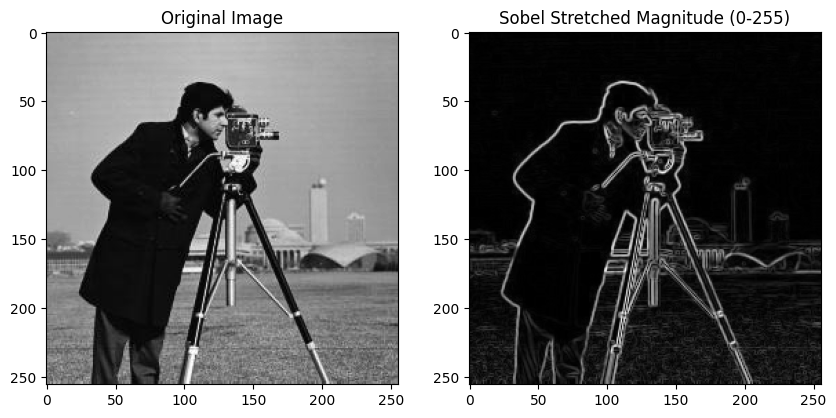

In [27]:
# Load the image
image = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)

# Get the value of sobel magnitude
x_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(x_sobel, y_sobel)

# Stretch the magnitude between 0 and 255
stretched_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Show the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(stretched_magnitude, cmap="gray")
plt.title("Sobel Stretched Magnitude (0-255)")

plt.show()


### *2- Compute the histogram of gradient magnitude*

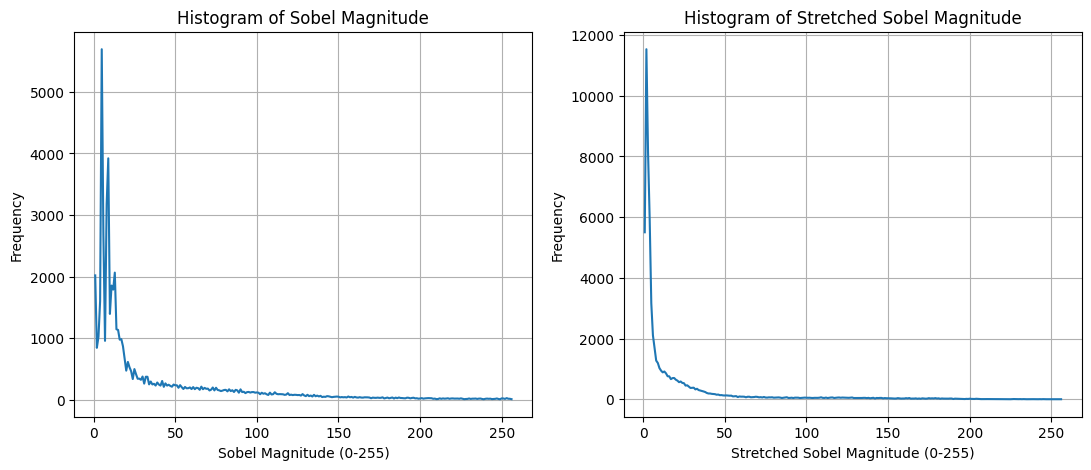

In [28]:
# Calculate the histogram
hist_before, bins_before = np.histogram(sobel_magnitude.flatten(), bins=256, range=[0, 256])
hist_after, bins_after = np.histogram(stretched_magnitude.flatten(), bins=256, range=[0, 256])

plt.figure(figsize=(13, 5))

# Plot the histogram before stretching
plt.subplot(1, 2, 1)
plt.plot(bins_before[1:], hist_before)
plt.xlabel("Sobel Magnitude (0-255)")
plt.ylabel("Frequency")
plt.title("Histogram of Sobel Magnitude")
plt.grid(True)

# Plot the histogram after stretching
plt.subplot(1, 2, 2)
plt.plot(bins_after[1:], hist_after)
plt.xlabel("Stretched Sobel Magnitude (0-255)")
plt.ylabel("Frequency")
plt.title("Histogram of Stretched Sobel Magnitude")
plt.grid(True)

plt.show()

### *3- Compute gradient orientation (the angle of gradient vector)*

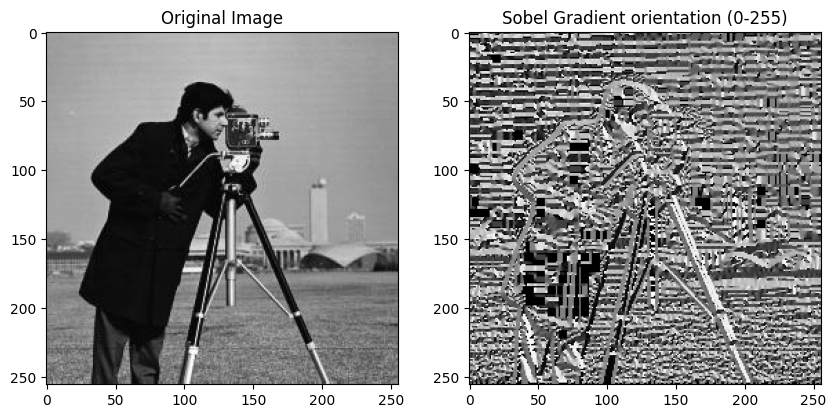

In [29]:
# Compute the orientation
orientation = cv2.phase(x_sobel, y_sobel, angleInDegrees=True)

# plot the original and the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(orientation, cmap="gray")
plt.title("Sobel Gradient orientation (0-255)")

plt.show()

### *4- Compute histogram of gradient orientation (angle between 0 and 2**pi)*

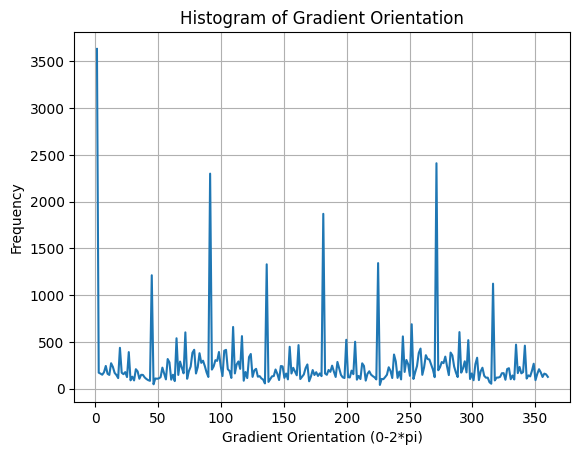

In [30]:
# Compute the histogram
hist, bins = np.histogram(orientation.flatten(), bins=256, range=[0, 360])

# plot the histogram
plt.plot(bins[1:], hist)
plt.xlabel("Gradient Orientation (0-2*pi)")
plt.ylabel("Frequency")
plt.title("Histogram of Gradient Orientation")
plt.grid(True)

plt.show()

# **Question 5:**
Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale
and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?

In [31]:
# Load the images
walk_1 = cv2.imread("walk_1.jpg", cv2.IMREAD_GRAYSCALE)
walk_2 = cv2.imread("walk_2.jpg", cv2.IMREAD_GRAYSCALE)

# Perform image subtraction
subtracted_image = cv2.subtract(walk_1, walk_2)

# Show the images and the subtraction
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(walk_1, cmap='gray')
plt.title('walk_1.jpg')

plt.subplot(1, 3, 2)
plt.imshow(walk_2, cmap='gray')
plt.title('walk_2.jpg')

plt.subplot(1, 3, 3)
plt.imshow(subtracted_image, cmap='gray')
plt.title('walk_1 - walk_2')

plt.show()

The result above shows the differences between the two photos. As seen above, the areas in walk_1 that are different from those in walk_2 are highlighted and not black. This happens because when the subtraction is applied, the values of each pixel will be subtracted from a same-place pixel in the second image, if the subtraction value is low, the pixel will be closer to the black (0), but if the subtraction value is high, the pixel will be closer to the white (255) based on the difference value.

## **Question 6:**
Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test
different values of 'Threshold'.

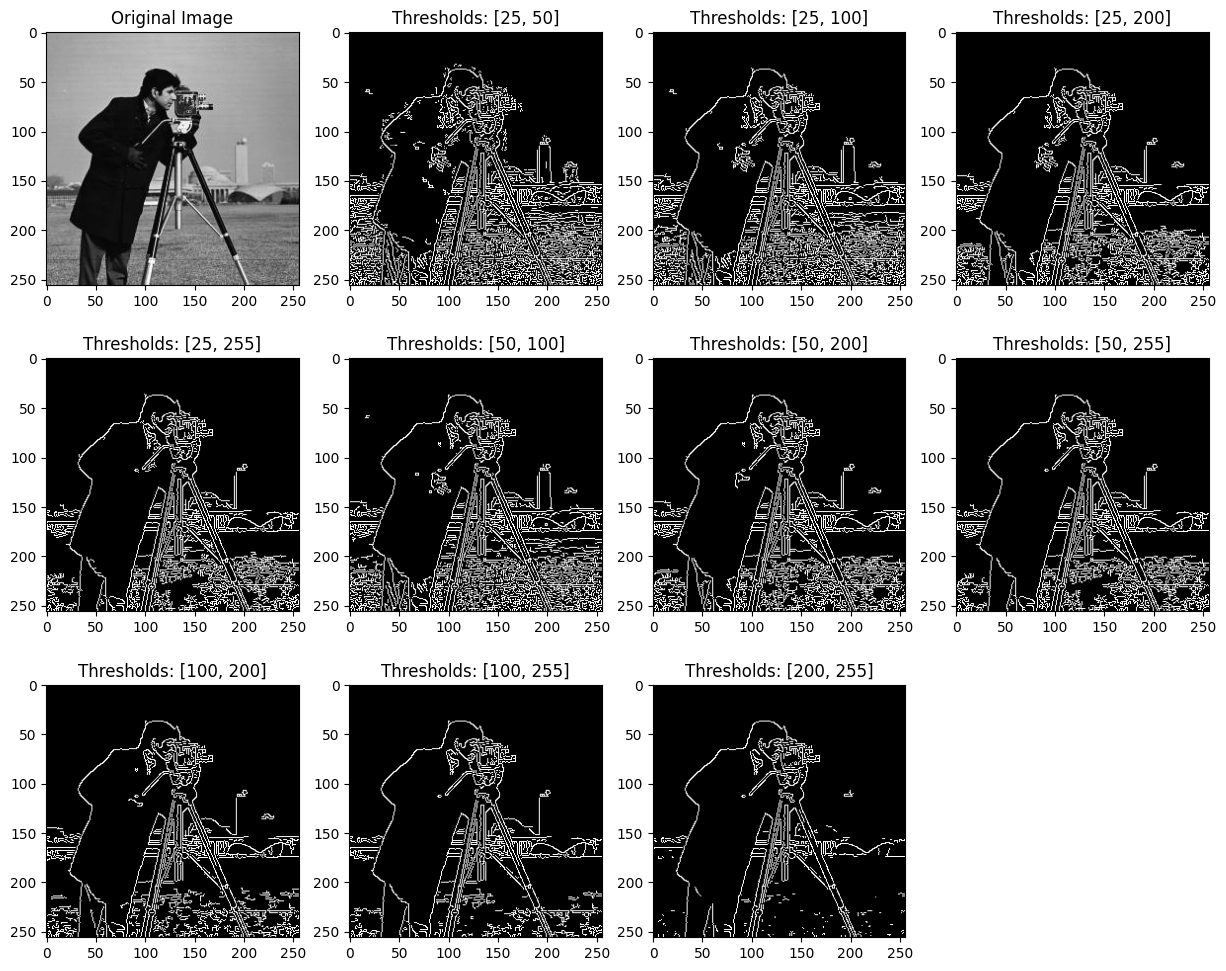

In [32]:
# Load the image
image = cv2.imread("Q_4.jpg", cv2.IMREAD_GRAYSCALE)

thresholds = [25, 50, 100, 200, 255]

# Plot the original image
plt.figure(figsize=(15, 12))
plt.subplot(3, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
place = 2

for i, threshold in enumerate(thresholds):
  for j, threshold_2 in enumerate(thresholds):
    if i < j:
      edges = cv2.Canny(image, threshold, threshold_2)
      # plot the edges
      plt.subplot(3, 4, place)
      plt.imshow(edges, cmap='gray')
      plt.title(f'Thresholds: [{threshold}, {threshold_2}]')
      place += 1

plt.show()

The results above provide insights into the sensitivity of edge detection by altering both low and high thresholds. Lower threshold values detect more edges, potentially including noise, whereas higher threshold values result in more selective detection of strong edges.